# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Data Collection and Analysis

In [3]:
df = pd.read_csv("analytics_dataset.csv", sep='\t') #import csv file 

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


# Outlier Detection

In [8]:
num_features = ['Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                      5599.5
Year_Birth                18.0
Income                 33219.0
Kidhome                    1.0
Teenhome                   1.0
Recency                   50.0
MntWines                 480.5
MntFruits                 32.0
MntMeatProducts          216.0
MntFishProducts           47.0
MntSweetProducts          32.0
MntGoldProds              47.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        4.0
NumStorePurchases          5.0
NumWebVisitsMonth          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              0.0
Z_Revenue                  0.0
Response                   0.0
dtype: float64


In [10]:
print((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR)))

      AcceptedCmp1  AcceptedCmp2  ...  Z_CostContact  Z_Revenue
0            False         False  ...          False      False
1            False         False  ...          False      False
2            False         False  ...          False      False
3            False         False  ...          False      False
4            False         False  ...          False      False
...            ...           ...  ...            ...        ...
2235         False         False  ...          False      False
2236         False         False  ...          False      False
2237         False         False  ...          False      False
2238         False         False  ...          False      False
2239         False         False  ...          False      False

[2240 rows x 26 columns]


In [11]:
df[num_features] = df[num_features][~((df[num_features] < (Q1 - 1.5 * IQR)) |(df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2240, 29)

# Data Cleaning

In [12]:
missing_values = pd.DataFrame(df.isnull().mean()*100)  
# Representing Null Values in percentage as it help in easily understanding of nullvalue weightage
missing_values

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,31.205357
MntWines,31.205357


In [13]:
df.loc[df['Recency'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
23,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0.0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9.0,4.0,0,0,0,0,0,0,3,11,0
66,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0,0,0,0,0,0,3,11,0
100,1473,1960,2n Cycle,Single,47823.0,0,1,23-07-2013,0.0,53.0,1.0,5.0,2.0,1.0,10.0,2.0,2.0,0.0,3.0,8.0,0,0,0,0,0,0,3,11,0
160,2795,1958,Master,Single,30523.0,2,1,01-07-2013,0.0,5.0,0.0,3.0,0.0,0.0,5.0,1.0,1.0,0.0,2.0,7.0,0,0,0,0,0,0,3,11,0
391,5642,1979,Master,Together,62499.0,1,0,09-12-2013,0.0,140.0,4.0,61.0,0.0,13.0,4.0,2.0,3.0,1.0,6.0,4.0,0,0,0,0,0,0,3,11,0
536,1991,1967,Graduation,Together,44931.0,0,1,18-01-2014,0.0,78.0,0.0,11.0,0.0,0.0,7.0,1.0,2.0,1.0,3.0,5.0,0,0,0,0,0,0,3,11,0
551,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1,0,0,0,0,0,3,11,1
749,4073,1954,2n Cycle,Married,63564.0,0,0,29-01-2014,0.0,769.0,80.0,252.0,15.0,34.0,65.0,1.0,10.0,10.0,7.0,6.0,1,0,0,0,0,0,3,11,1
758,10470,1979,Master,Married,40662.0,1,0,15-03-2013,0.0,40.0,2.0,23.0,0.0,4.0,23.0,2.0,2.0,1.0,3.0,4.0,0,0,0,0,0,0,3,11,0
810,2964,1981,Graduation,Married,26872.0,0,0,16-10-2013,0.0,3.0,10.0,8.0,3.0,16.0,32.0,1.0,1.0,1.0,2.0,6.0,0,0,0,0,0,0,3,11,0


In [14]:
df.isnull().mean()*100

ID                      0.000000
Year_Birth              0.000000
Education               0.000000
Marital_Status          0.000000
Income                  1.071429
Kidhome                 0.000000
Teenhome                0.000000
Dt_Customer             0.000000
Recency                31.205357
MntWines               31.205357
MntFruits              31.205357
MntMeatProducts        31.205357
MntFishProducts        31.205357
MntSweetProducts       31.205357
MntGoldProds           31.205357
NumDealsPurchases      31.205357
NumWebPurchases        31.205357
NumCatalogPurchases    31.205357
NumStorePurchases      31.205357
NumWebVisitsMonth      31.205357
AcceptedCmp3            0.000000
AcceptedCmp4            0.000000
AcceptedCmp5            0.000000
AcceptedCmp1            0.000000
AcceptedCmp2            0.000000
Complain                0.000000
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                0.000000
dtype: float64

In [15]:
list(df['Education'].unique())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

In [16]:
list(df['Marital_Status'].unique())

['Single',
 'Together',
 'Married',
 'Divorced',
 'Widow',
 'Alone',
 'Absurd',
 'YOLO']

In [17]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [18]:
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd','YOLO','Alone'], 'Single')

In [19]:
list(df['Kidhome'].unique())

[0, 1, 2]

In [20]:
list(df['Teenhome'].unique())

[0, 1, 2]

In [21]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
for i in num_features:
  df[i] = df[i].fillna(df[i].mean())

In [22]:
df.isnull().sum() #Final check of null values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Data Wrangling

In [23]:
df['Total_purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
# Addition of Total_purchase column to get an idea of overall spending

In [24]:
df['Spend_type_online'] = df['NumWebPurchases']
df['Spend_type_offline'] = df['NumCatalogPurchases'] + df['NumStorePurchases']
# Addition of 2 spend type columns to get an idea on which mode of purchase users prefer the most.

# Exploratory Data Analysis

### Education vs Spend

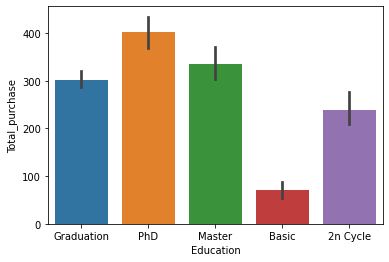

In [25]:
sns.barplot(x=df['Education'],y=df['Total_purchase'])

**The Above barplot inprets that People with Higher Education tends to spend more as compared to people with low level of education. Reason might be employment status or sense of need**

### Kids Count vs Gold Spend

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


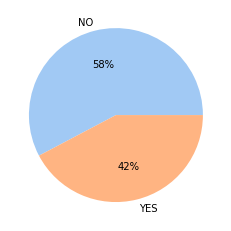

In [26]:
colors = sns.color_palette('pastel')[0:5]
data = df.Kidhome.value_counts()
final_data = [[data[0]],[data[1]+data[2]]]
labels = ['NO','YES']
#create pie chart
plt.pie(final_data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

**Users who has kids at home tends to spend LESS money in gold, majorly due to sense of responsibility i.e savings for future**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


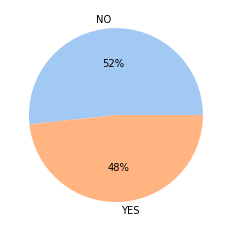

In [62]:
colors = sns.color_palette('pastel')[0:5]
data = df.Teenhome.value_counts()
final_data = [[data[0]],[data[1]+data[2]]]
labels = ['NO','YES']
#create pie chart
plt.pie(final_data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

**Similar case to kids at home is seen when a users has a teen at home**

### Marital Status vs Wine Spend

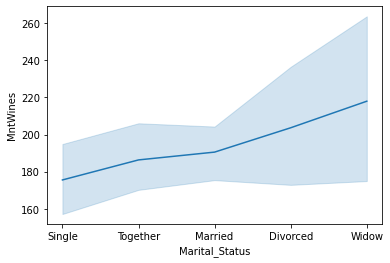

In [27]:
sns.lineplot(x = df['Marital_Status'],y=df['MntWines'])

**As seen in above lineplot, user's marital status has propotional realtion with its spending on wine. Widowed and Divorced people tend to spend more on wine considering they belong to higher age group as well**

--------------------------------------------------------------------------------

***I have limited to 3 EDAs as assigment mentioned those and adding more EDA would have increased the size of model.***

--------------------------------------------------------------------------------

# Creating RFM Market Analysis Model

When we are provided with raw data extracted from database, it might be messy and non-informative to look at individual records. RFM analysis is applied to present data at aggregate level and is used to segment customers into homogenous groups. It has been adopted in business since long ago, especially as part of marketing effort. Three main variables as suggested by the title of analysis, R-recency, F-frequency, and M-monetary, are defined and computed. These three values are important as F and M indicate value of customers, and R indicate customers’ engagement and satisfaction. The values are easy to obtain from the basic set of information for each purchasing history.


**R** — Higher score implies that particular customer has recently made a purchase and will most likely response to current promotion. Low R score reveals the possibility of being churned.

**F** — Higher score implies customer has made repeated purchasing at higher frequency. (High demand / Loyalty)

**M** — Higher score implies purchasing at larger amount. (High value customer)

In [28]:
rfm_df = pd.DataFrame()
rfm_df['CustomerID'] = df['ID']
rfm_df['Recency'] = df['Recency']
rfm_df['Frequency'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases']
rfm_df['Monetary'] = df['Total_purchase']

In [29]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,5524,49.083063,11.887086,318.427644
1,2174,38.000000,6.000000,27.000000
2,4141,26.000000,21.000000,776.000000
3,6182,26.000000,8.000000,53.000000
4,5324,94.000000,19.000000,422.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


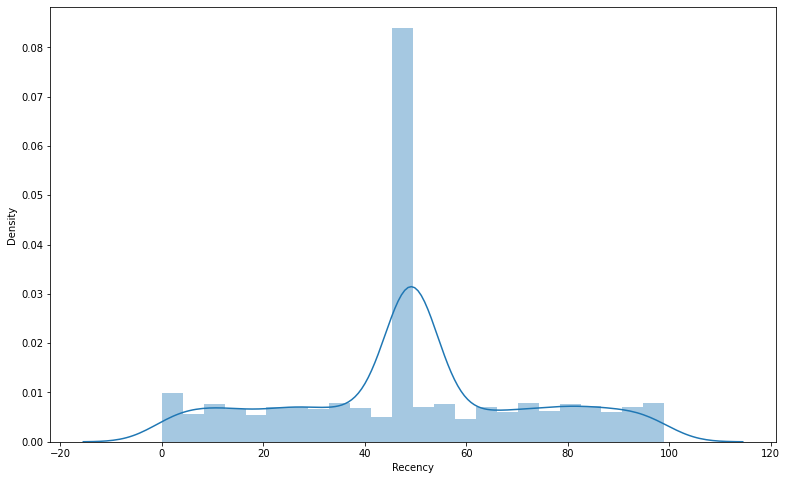

In [30]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


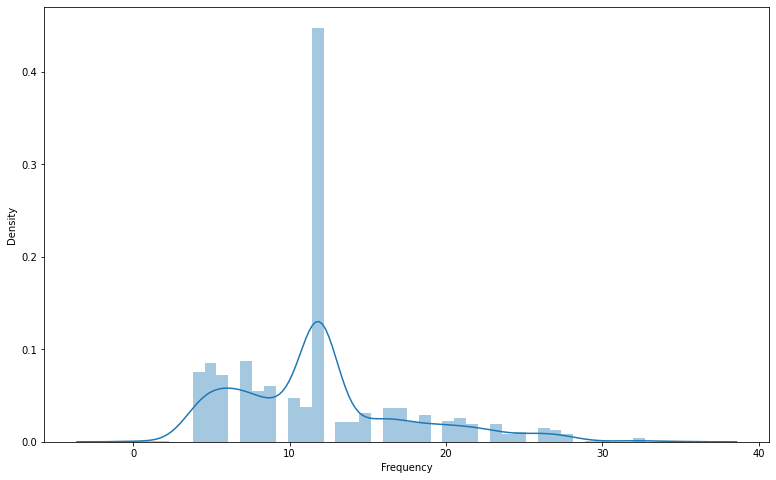

In [31]:
#Frequency Distribution Plot
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


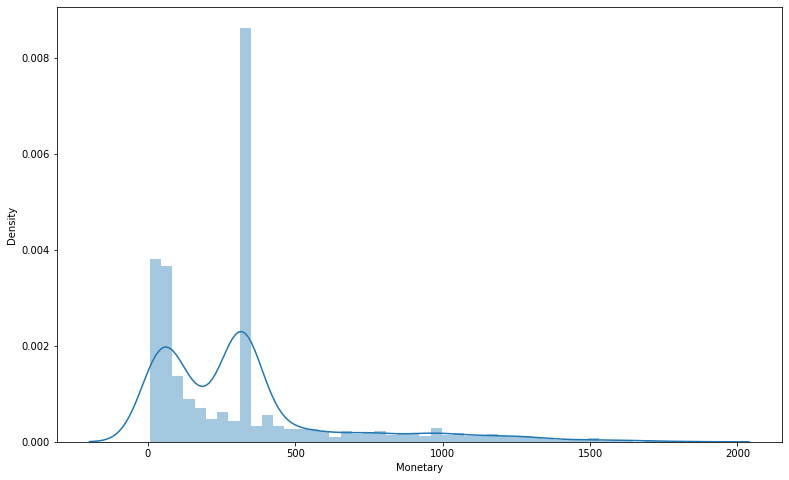

In [32]:
#Monetary Distribution Plot
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [33]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [34]:
quantiles

{'CustomerID': {0.25: 2828.25, 0.5: 5458.5, 0.75: 8427.75},
 'Frequency': {0.25: 8.0, 0.5: 11.887086307592472, 0.75: 13.0},
 'Monetary': {0.25: 69.0, 0.5: 318.4276443867618, 0.75: 318.4276443867618},
 'Recency': {0.25: 35.0, 0.5: 49.083062946138874, 0.75: 63.0}}

In [35]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [36]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,5524,49.083063,11.887086,318.427644,2,3,3
1,2174,38.000000,6.000000,27.000000,2,4,4
2,4141,26.000000,21.000000,776.000000,1,1,1
3,6182,26.000000,8.000000,53.000000,1,4,4
4,5324,94.000000,19.000000,422.000000,4,1,1


In [37]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,5524,49.083063,11.887086,318.427644,2,3,3,233,8
1,2174,38.000000,6.000000,27.000000,2,4,4,244,10
2,4141,26.000000,21.000000,776.000000,1,1,1,111,3
3,6182,26.000000,8.000000,53.000000,1,4,4,144,9
4,5324,94.000000,19.000000,422.000000,4,1,1,411,6


## Using Recency and Monetary

### Applying Silhouette score

In [38]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency','Monetary']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5470196879393353
For n_clusters = 3, silhouette score is 0.4897601362694983
For n_clusters = 4, silhouette score is 0.5383716896178282
For n_clusters = 5, silhouette score is 0.5567924007825916
For n_clusters = 6, silhouette score is 0.571294945367957
For n_clusters = 7, silhouette score is 0.5769888682220697
For n_clusters = 8, silhouette score is 0.587473103474486
For n_clusters = 9, silhouette score is 0.5749235217444213
For n_clusters = 10, silhouette score is 0.5793136184261939
For n_clusters = 11, silhouette score is 0.5645374836157397
For n_clusters = 12, silhouette score is 0.5663799066824129
For n_clusters = 13, silhouette score is 0.5722779390596234
For n_clusters = 14, silhouette score is 0.5778176570429384
For n_clusters = 15, silhouette score is 0.5716920523468076


### Applying elbow method

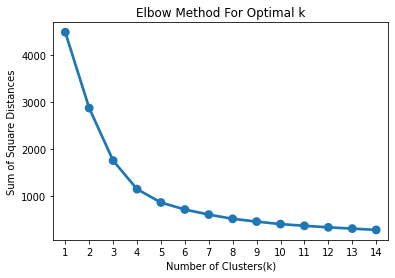

In [39]:
features_rec_mon=['Recency','Monetary']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

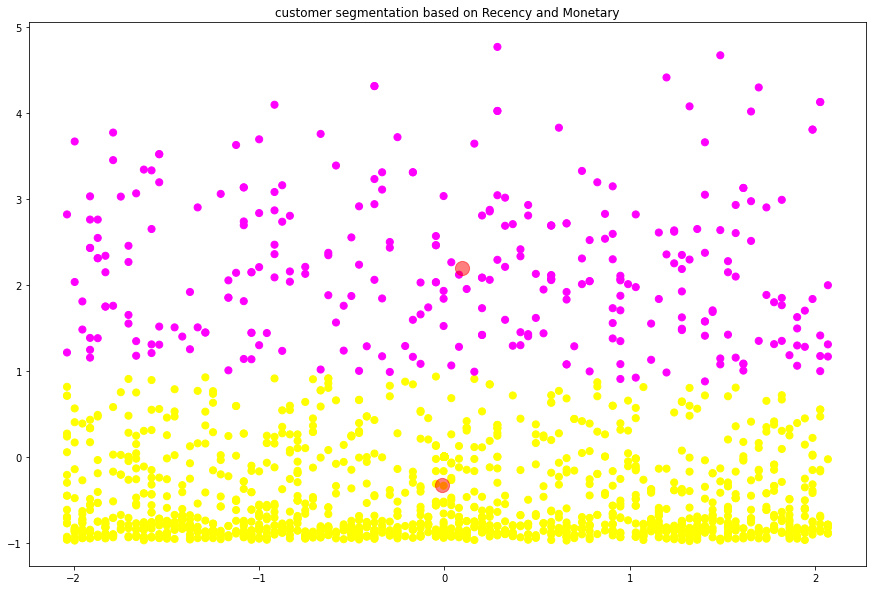

In [41]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Applying DBSCAN

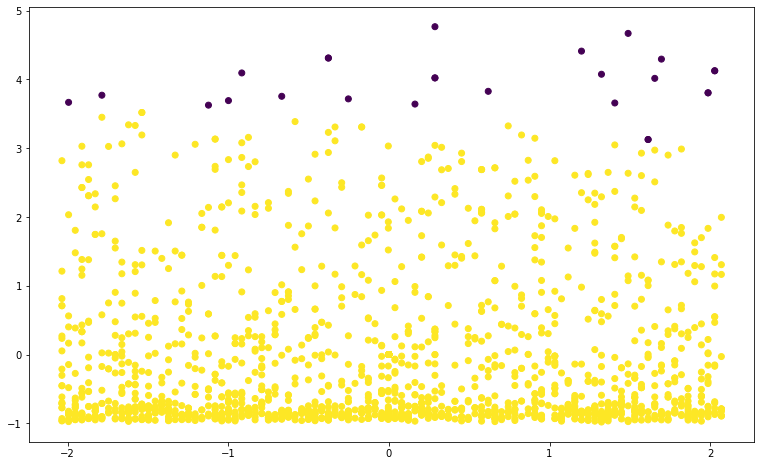

In [42]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

## Using Frequency and Monetary

### Applying Silhouette score

In [43]:
features_fre_mon=['Frequency','Monetary']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6728142061435922
For n_clusters = 3, silhouette score is 0.6389407064706261
For n_clusters = 4, silhouette score is 0.637144869101372
For n_clusters = 5, silhouette score is 0.6458651369924261
For n_clusters = 6, silhouette score is 0.6136747604055947
For n_clusters = 7, silhouette score is 0.6235762566523818
For n_clusters = 8, silhouette score is 0.631129404781587
For n_clusters = 9, silhouette score is 0.6284453256655407
For n_clusters = 10, silhouette score is 0.6177009726145224
For n_clusters = 11, silhouette score is 0.6203088161486771
For n_clusters = 12, silhouette score is 0.6210560694519868
For n_clusters = 13, silhouette score is 0.6241858330414466
For n_clusters = 14, silhouette score is 0.6264916689145872
For n_clusters = 15, silhouette score is 0.6212575141598654


### Applying Elbow Method

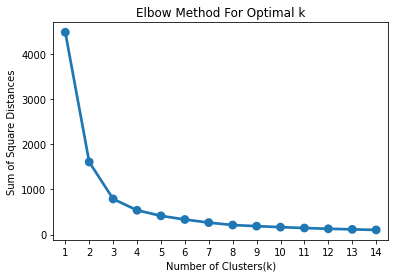

In [44]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

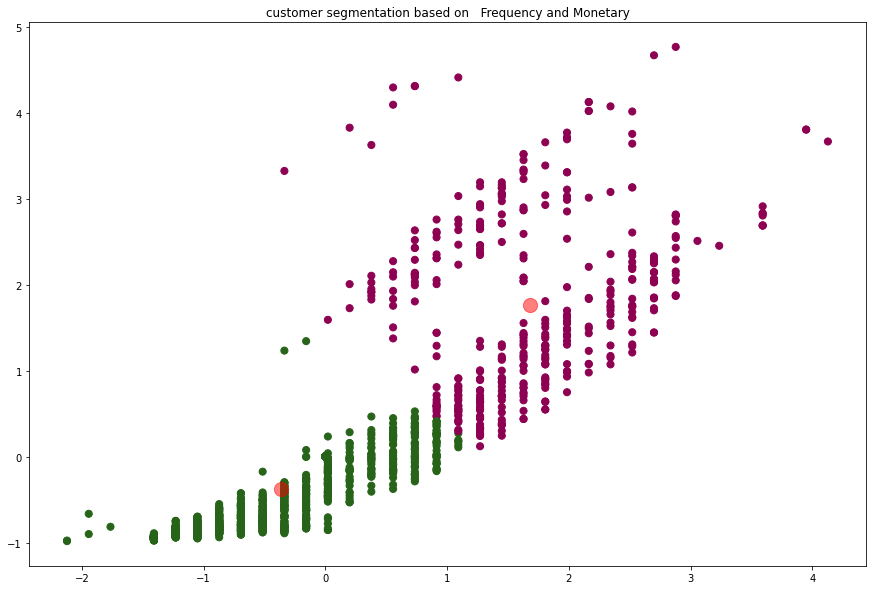

In [46]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Applying DBSCAN 

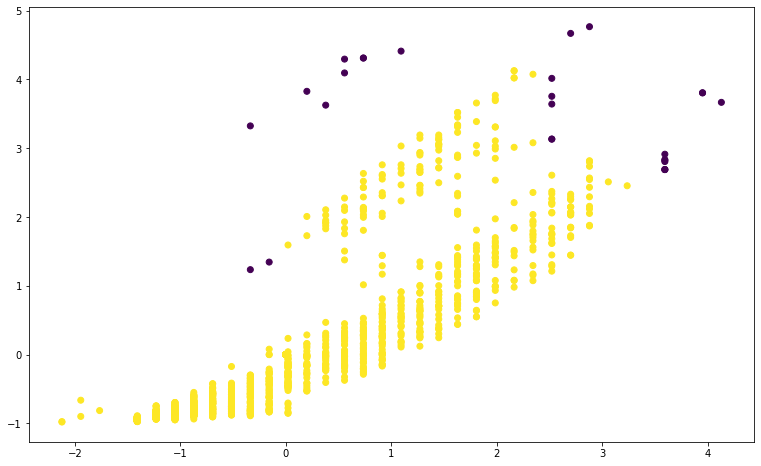

In [47]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

## Comparision Plot of R vs M and F vs M

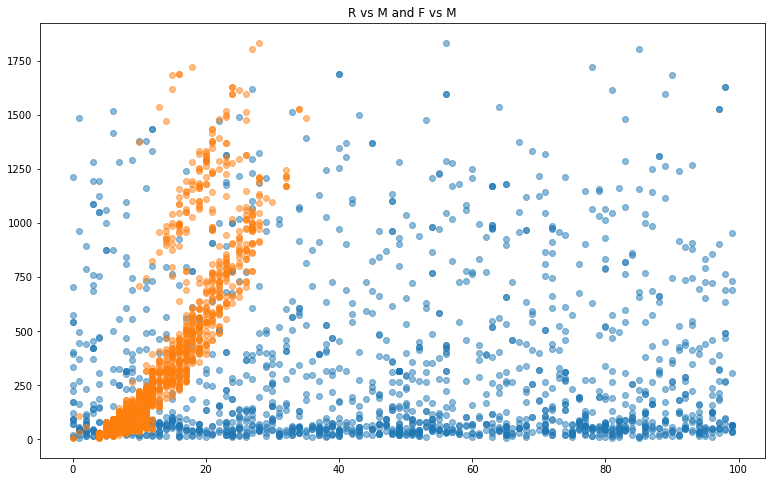

In [48]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency,rfm_df.Monetary,alpha=0.5)
plt.scatter(rfm_df.Frequency,rfm_df.Monetary,alpha=0.5)

## 3D Projection of RFM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


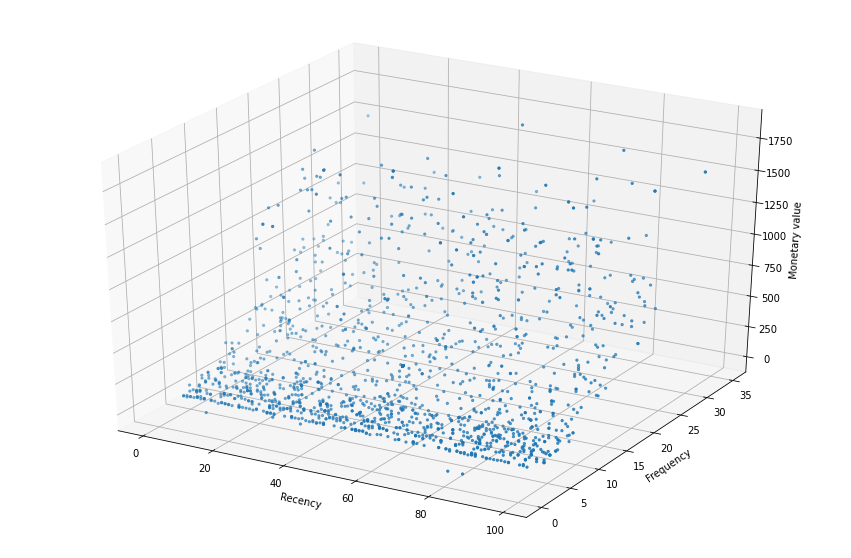

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency
ys=rfm_df.Frequency
zs=rfm_df.Monetary
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

## Using Recency, Frequency and Monetary

In [59]:
feature_vector=['Recency','Frequency','Monetary']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

### Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.5353595130967175
For n_clusters = 3 The average silhouette_score is : 0.4280092143370242
For n_clusters = 4 The average silhouette_score is : 0.5028361437872777
For n_clusters = 5 The average silhouette_score is : 0.5205567162299338
For n_clusters = 6 The average silhouette_score is : 0.5395134759507048
For n_clusters = 7 The average silhouette_score is : 0.5359189576177005
For n_clusters = 8 The average silhouette_score is : 0.5421340246159173
For n_clusters = 9 The average silhouette_score is : 0.5359617843331723
For n_clusters = 10 The average silhouette_score is : 0.540104055363266
For n_clusters = 11 The average silhouette_score is : 0.5233845995644407
For n_clusters = 12 The average silhouette_score is : 0.5486407345176065
For n_clusters = 13 The average silhouette_score is : 0.5355218694271833
For n_clusters = 14 The average silhouette_score is : 0.5194396342476176
For n_clusters = 15 The average silhouette_score is : 0.5309

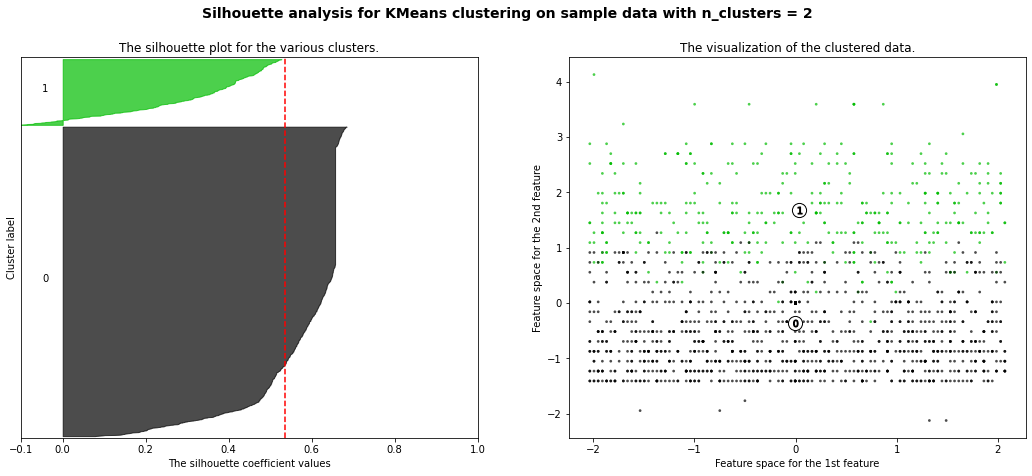

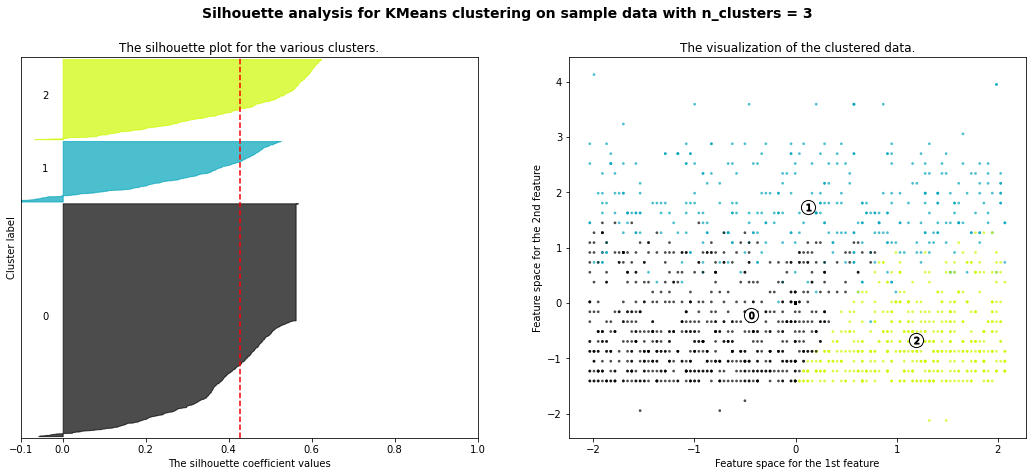

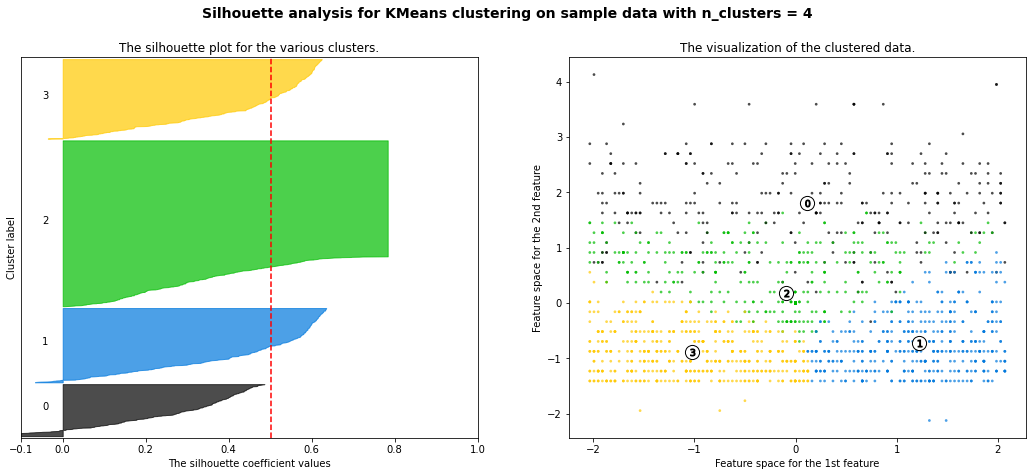

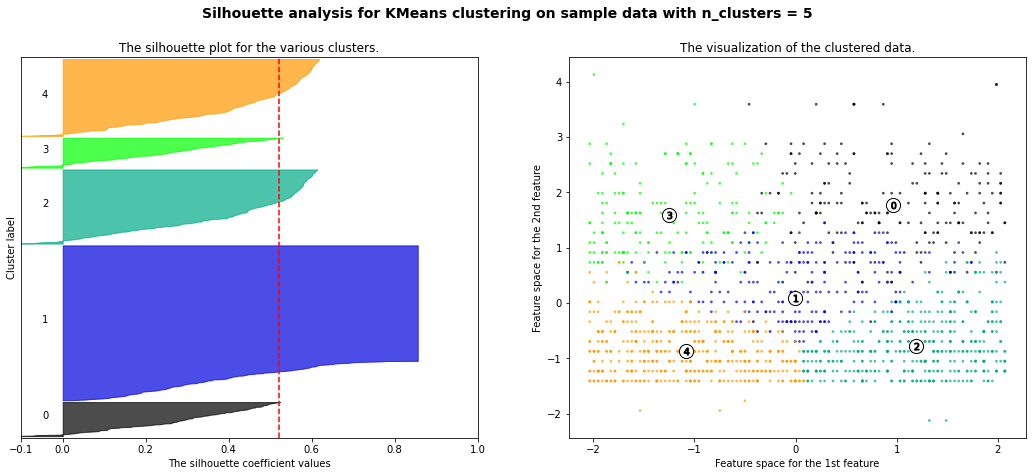

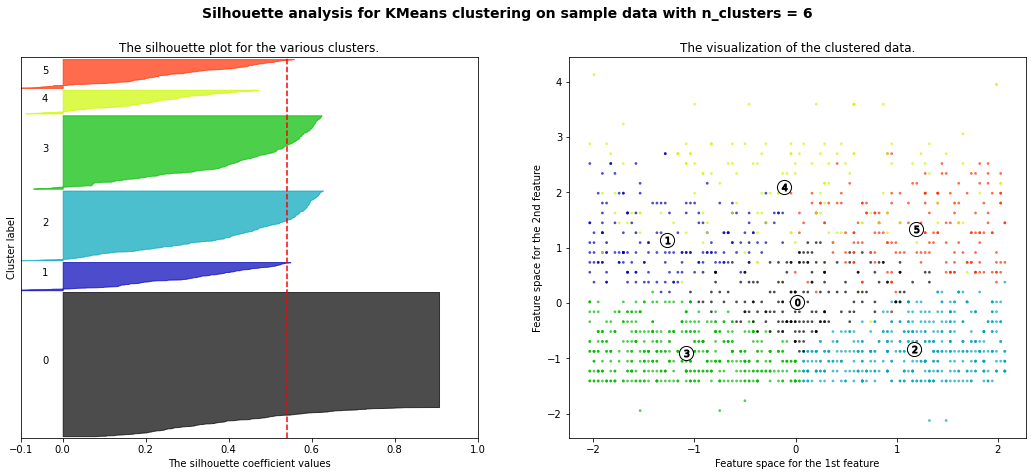

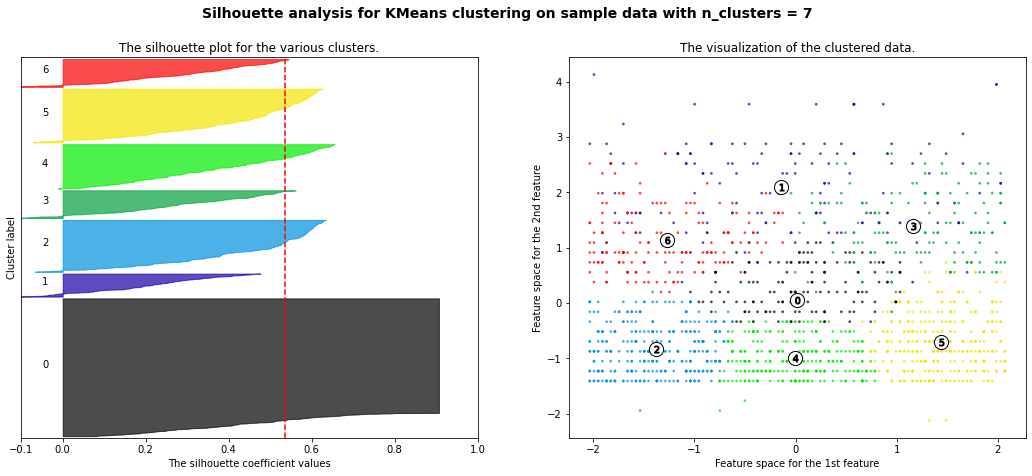

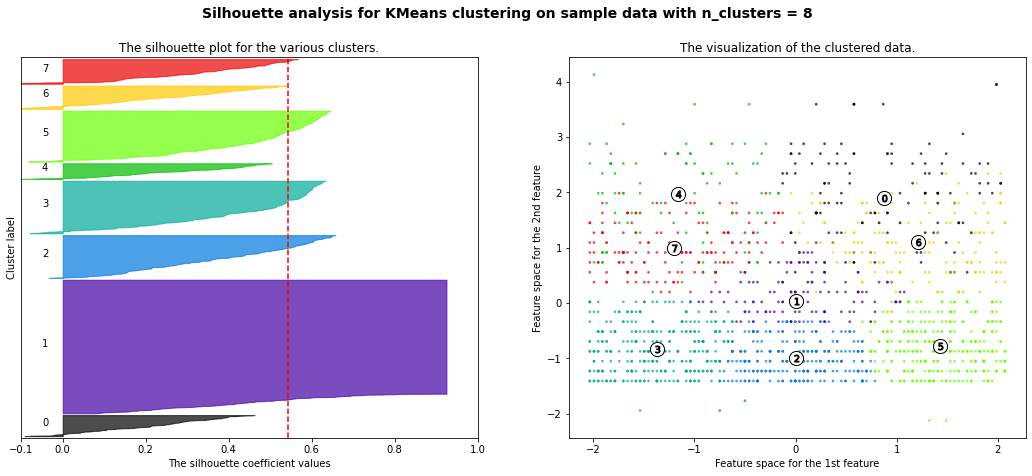

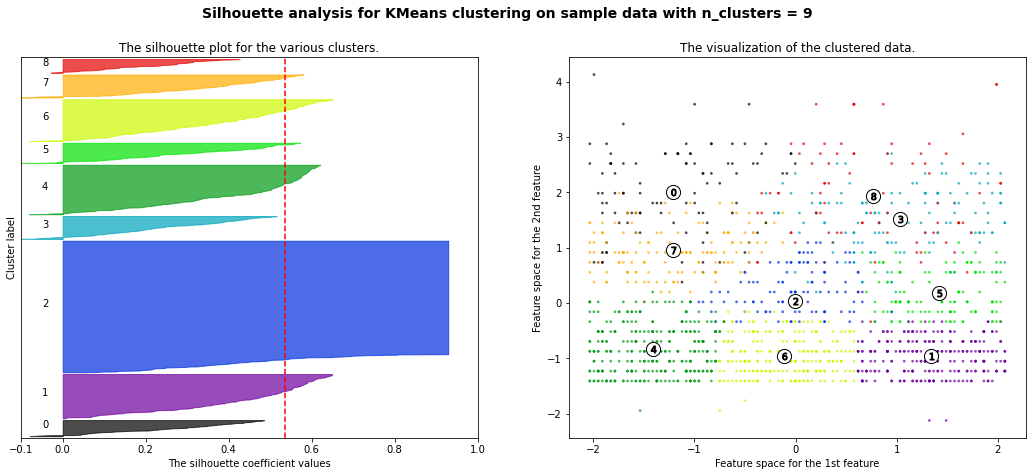

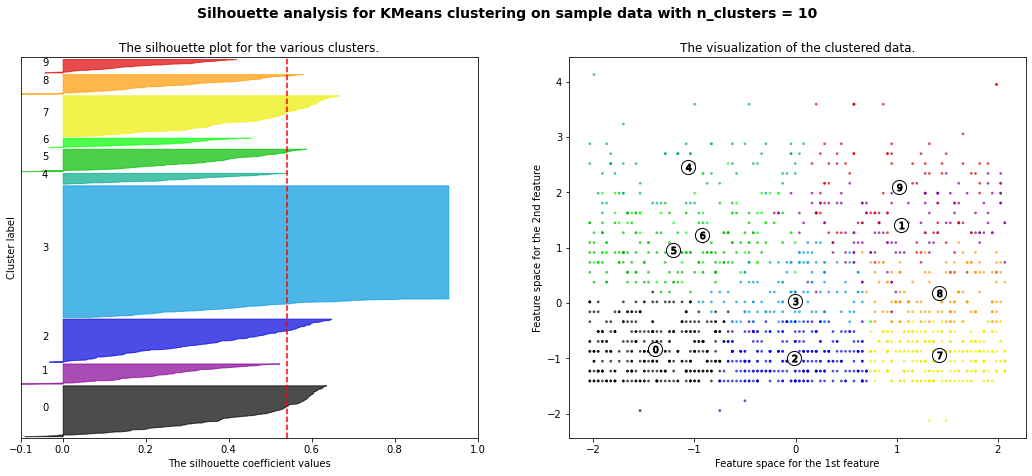

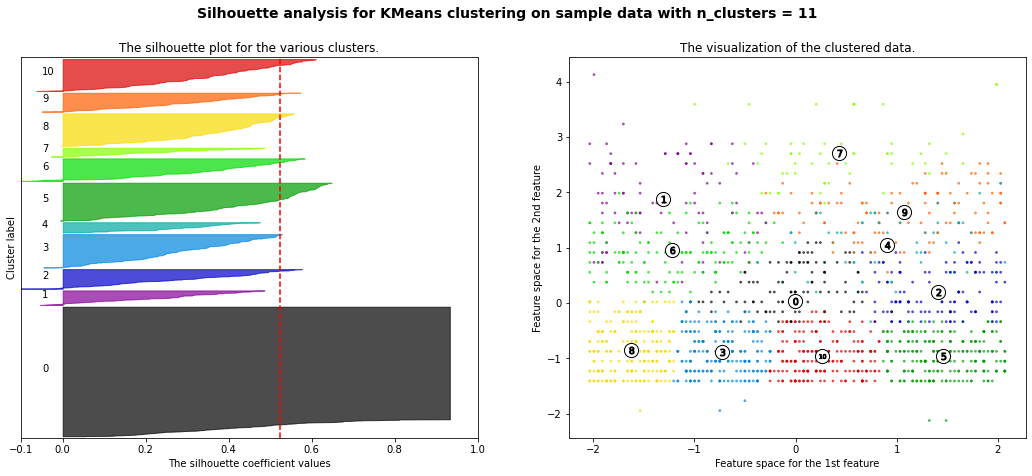

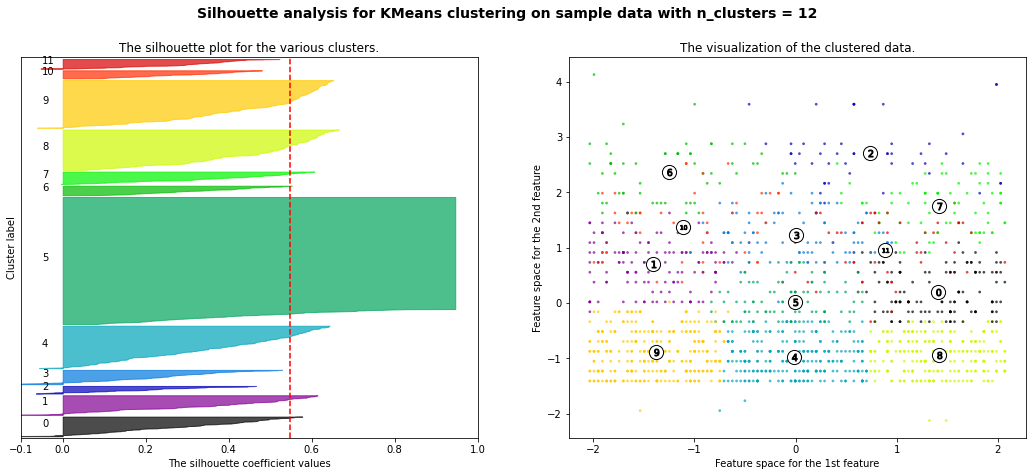

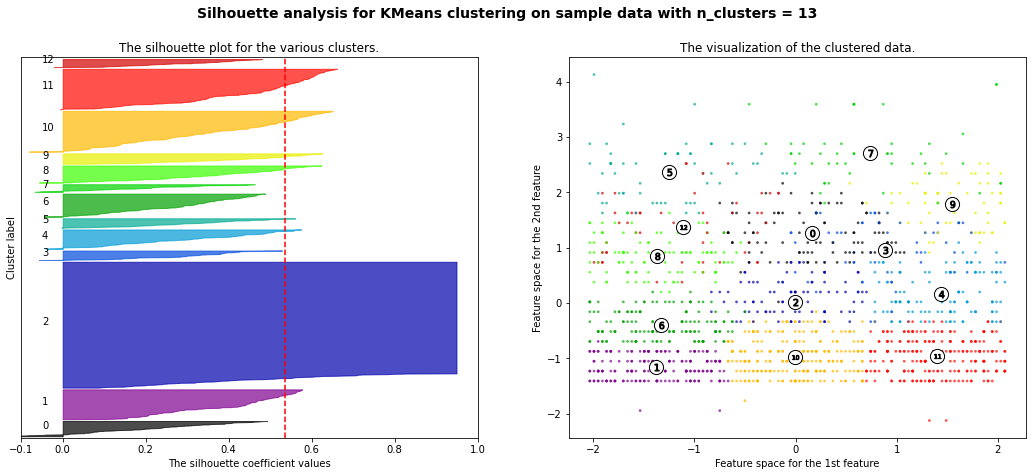

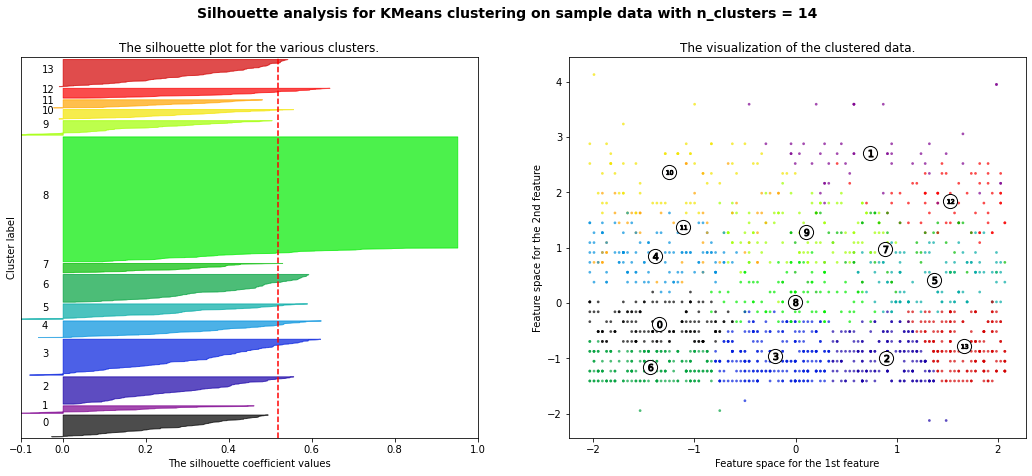

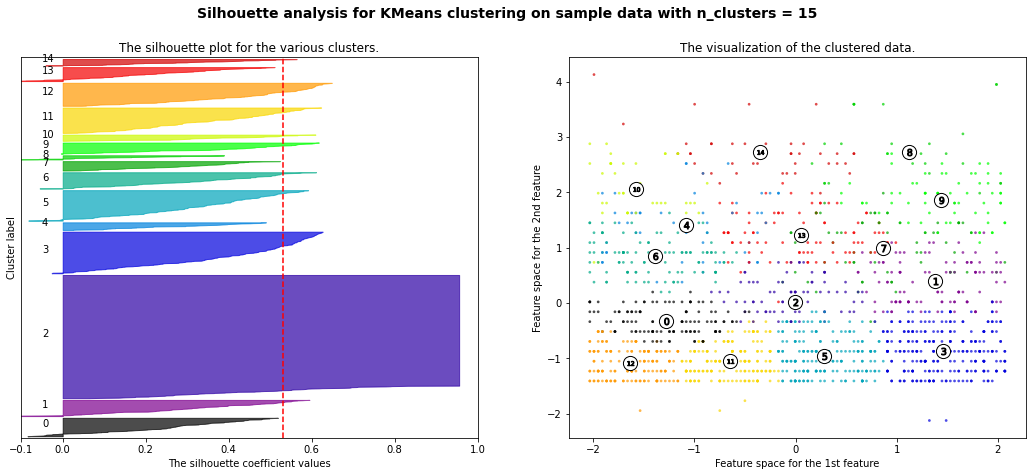

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

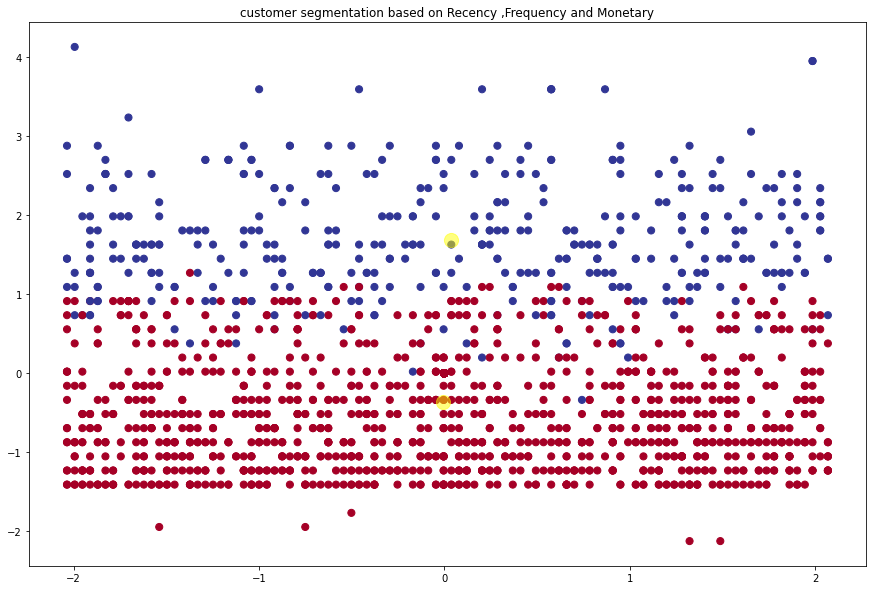

In [61]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

### Elbow method on RFM

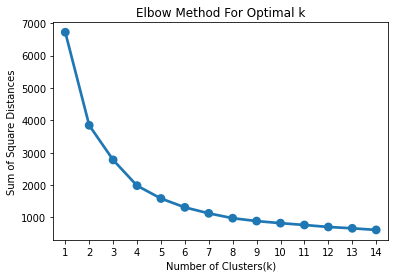

In [54]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
0,5524,49.083063,11.887086,318.427644,2,3,3,233,8,0
1,2174,38.000000,6.000000,27.000000,2,4,4,244,10,0
2,4141,26.000000,21.000000,776.000000,1,1,1,111,3,1
3,6182,26.000000,8.000000,53.000000,1,4,4,144,9,0
4,5324,94.000000,19.000000,422.000000,4,1,1,411,6,1
5,7446,16.000000,22.000000,716.000000,1,1,1,111,3,1
6,965,34.000000,21.000000,590.000000,1,1,1,111,3,1
7,6177,32.000000,10.000000,169.000000,1,3,3,133,7,0
8,4855,19.000000,6.000000,46.000000,1,4,4,144,9,0
9,5899,49.083063,11.887086,318.427644,2,3,3,233,8,0


In [69]:
list(rfm_df['Cluster'].unique())

[0, 1]

### DBSCAN on RFM

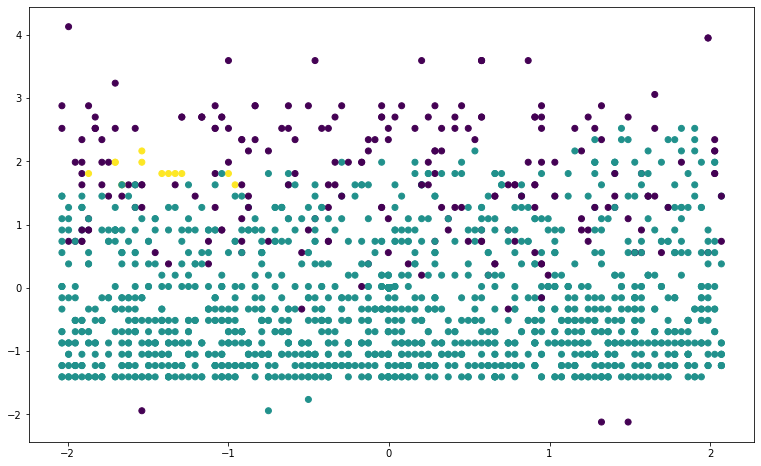

In [56]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [70]:
rfm_df.groupby('Cluster').agg({'Recency':['mean','min','max'],'Frequency':['mean','min','max'],'Monetary':['mean','min','max','count']})

Recency             Frequency  ...    Monetary                     
              mean  min   max       mean  ...        mean    min     max count
Cluster                                   ...                                 
0        48.907992  0.0  99.0   9.876596  ...  197.711924    6.0   746.0  1847
1        49.905852  0.0  99.0  21.335878  ...  885.760814  395.0  1835.0   393

[2 rows x 10 columns]

## Summary

In [71]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
+--------+--------------------------------+------+--

# Conclusions

1. We used different variables in RFM analysis as some variables of RFM are not always helpful. So we first tried with RM and FM to see their performance and later used all variables.

2. To check optimal number of clusters, we used silhouette analysis as well as Elbow method. In most models, number of clusters was two.

3. Further we tried DBSCAN clustering with each set of variables, as it has an upperhand on KMeans in defining number of clusters. Most of the time, Kmeans and DBSCAN had same number of clusters.

4. Optimal Number of Clusters is TWO.

5. Considering this clusters, the **BEST Customers** would be of **Cluster 1**.